In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import scipy as sp
p = sp.poly1d([3,4,5])
print p
print p*p
print p.deriv()
print p.integ(k=6)
print p([4,5])

   2
3 x + 4 x + 5
   4      3      2
9 x + 24 x + 46 x + 40 x + 25
 
6 x + 4
   3     2
1 x + 2 x + 5 x + 6
[ 69 100]


# Linear Algebra

In [3]:
from scipy import linalg
import numpy as np

arr = np.array([[1,2],[3,4]])
print arr

# determinant of a square matrix
print linalg.det(arr)

# inverse of a square matrix
iarr = linalg.inv(arr)
print iarr

# check if it is correct
print np.allclose(np.dot(arr,iarr), np.eye(2))

[[1 2]
 [3 4]]
-2.0
[[-2.   1. ]
 [ 1.5 -0.5]]
True


# Fast Fourier Transforms

True


/home/astrodoo/anaconda2/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


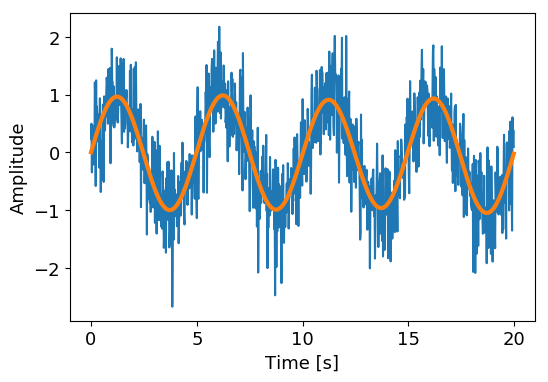

In [4]:
#import scipy as sp
from scipy import fftpack
import numpy as np
import matplotlib.pyplot as plt

time_step = 0.02
period = 5.
time_vec = np.arange(0., 20., time_step)
sig = np.sin(2.*np.pi / period * time_vec) + \
      0.5 * np.random.randn(time_vec.size)

sample_freq = fftpack.fftfreq(sig.size, d=time_step)
sig_fft = fftpack.fft(sig)

pidxs = np.where(sample_freq > 0)
freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

freq = freqs[power.argmax()]
print np.allclose(freq, 1./period)

sig_fft[np.abs(sample_freq) > freq] = 0

main_sig = fftpack.ifft(sig_fft)

# draw plot
plt.figure()
plt.plot(time_vec,sig)
plt.plot(time_vec, main_sig, linewidth=3)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

# Optimize

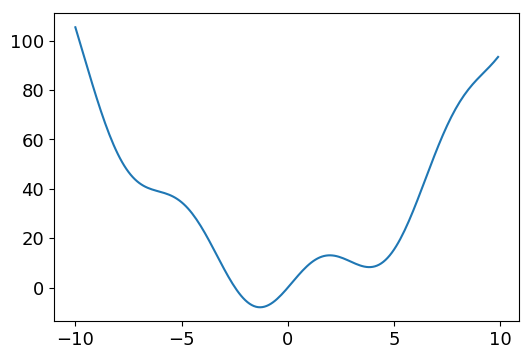

In [5]:
from scipy import optimize
import matplotlib.pyplot as plt

def f(x):
    return x**2 + 10.*np.sin(x)

x = np.arange(-10,10,0.1)
plt.plot(x, f(x))
plt.show()

Optimization terminated successfully.
         Current function value: 8.315586
         Iterations: 6
         Function evaluations: 21
         Gradient evaluations: 7
[ 3.83746709]
[-1.30641113]
3.8374671195
[ 0.]
[-2.47948183]
[  0.99912857  10.08807092]


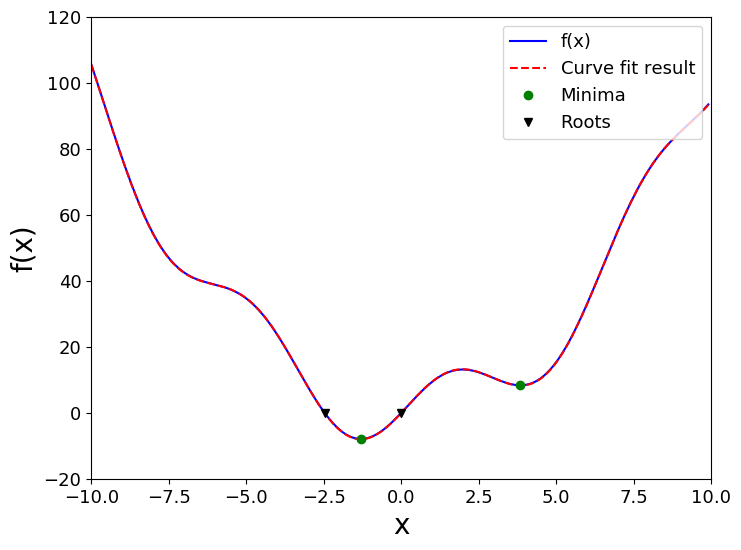

In [6]:
""" Finding a global minimum point """

# optimize.fmin_bfgs(f,0)
# this may find a local minimum rather than global minimum
print optimize.fmin_bfgs(f,3) 

# finding a global minimum

grid = (-10,10,0.1)    # same as x in tuple
xmin_global = optimize.brute(f,(grid,))
print xmin_global

# For larger grid sizes scipy.optimize.brute() becomes quite
# slow. scipy.optimize.anneal() provides an alternative, using
# simulated annealing.

""" Finding a local minimum point """

xmin_local = optimize.fminbound(f, 0, 10)
print xmin_local

""" Finding a root """

root = optimize.fsolve(f, 1)   # initial guess is 1
print root    # only one root is found.

root2 = optimize.fsolve(f, -2.5)  # different initial guess
print root2


""" Curve fitting """

xdata = np.linspace(-10,10, num=20)
ydata = f(xdata) + np.random.randn(xdata.size)

def f2(x,a,b):
    return a*x**2 + b*np.sin(x)

guess = [2,2]
params, params_covariance = optimize.curve_fit(f2, xdata, ydata, guess)
print params


""" Draw """
plt.figure(figsize=(8,6))
plt.plot(x, f(x),'b-',label='f(x)')
plt.plot(x, f2(x,params[0],params[1]),'r--',label='Curve fit result')
plt.plot([xmin_global,xmin_local],[f(xmin_global),f(xmin_local)], \
        'go',label='Minima')
#plt.scatter([root,],[0,],color='green',s=50, label='Roots')
plt.plot([root,root2],[0,0],'kv',label='Roots')
plt.xlim(-10, 10)
plt.ylim(-20, 120)
plt.xlabel('x', fontsize=20)
plt.ylabel('f(x)', fontsize=20)
plt.legend(loc='upper right')
plt.show()

### Interpolation

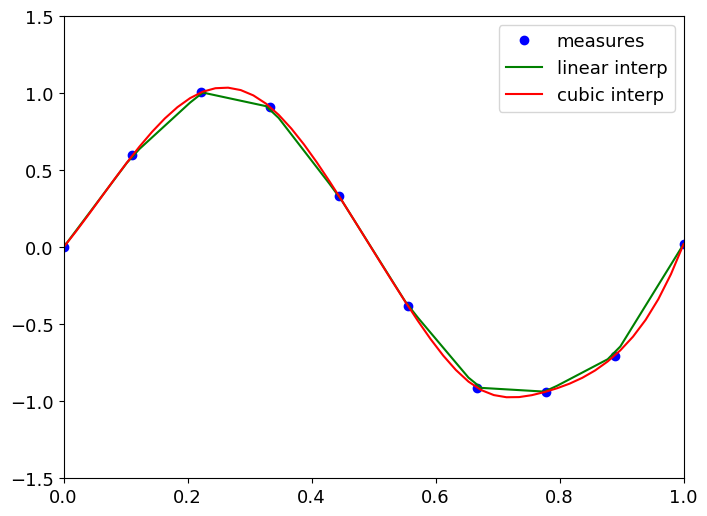

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


measured_time = np.linspace(0,1,10)
noise = (np.random.random(10)*2 - 1) * 1e-1
measures = np.sin(2.*np.pi*measured_time) + noise

linear_interp = interp1d(measured_time, measures)

computed_time = np.linspace(0,1,50)
linear_results = linear_interp(computed_time)

cubic_interp = interp1d(measured_time, measures, kind='cubic')
cubic_results = cubic_interp(computed_time)


""" Draw """
plt.figure(figsize=(8,6))

plt.plot(measured_time, measures, 'bo', label='measures')
plt.xlim(0.,1.)
plt.ylim(-1.5,1.5)
plt.plot(computed_time, linear_results, 'g-', label='linear interp')
plt.plot(computed_time, cubic_results, 'r-', label='cubic interp')
plt.legend(loc='upper right')

plt.show()

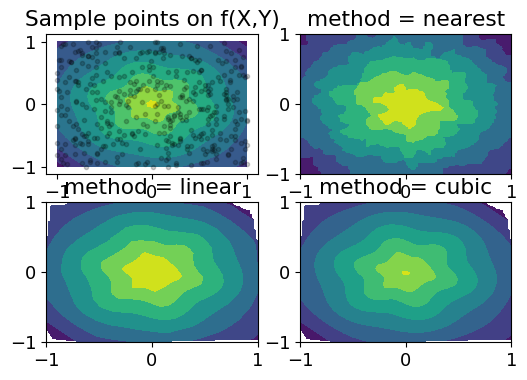

In [8]:
%matplotlib inline

""" interpolate 2d """

import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

x = np.linspace(-1,1,100)
y =  np.linspace(-1,1,100)
X, Y = np.meshgrid(x,y)

def f(x, y):
    s = np.hypot(x, y)
    phi = np.arctan2(y, x)
    tau = s + s*(1-s)/5 * np.sin(6*phi) 
    return 5*(1-tau) + tau

T = f(X, Y)
# Choose npts random point from the discrete domain of our model function
npts = 400
px, py = np.random.choice(x, npts), np.random.choice(y, npts)

fig, ax = plt.subplots(nrows=2, ncols=2)
# Plot the model function and the randomly selected sample points
ax[0,0].contourf(X, Y, T)
ax[0,0].scatter(px, py, c='k', alpha=0.2, marker='.')
ax[0,0].set_title('Sample points on f(X,Y)')

# Interpolate using three different methods and plot
for i, method in enumerate(('nearest', 'linear', 'cubic')):
    Ti = griddata((px, py), f(px,py), (X, Y), method=method)
    r, c = (i+1) // 2, (i+1) % 2
    ax[r,c].contourf(X, Y, Ti)
    ax[r,c].set_title('method = {}'.format(method))

plt.show()

### integrate

In [9]:
from scipy.integrate import quad

res, err = quad(np.sin, 0, np.pi/2)
print np.allclose(res,1)
print np.allclose(err, 1-res)

True
True


[0]
[129]


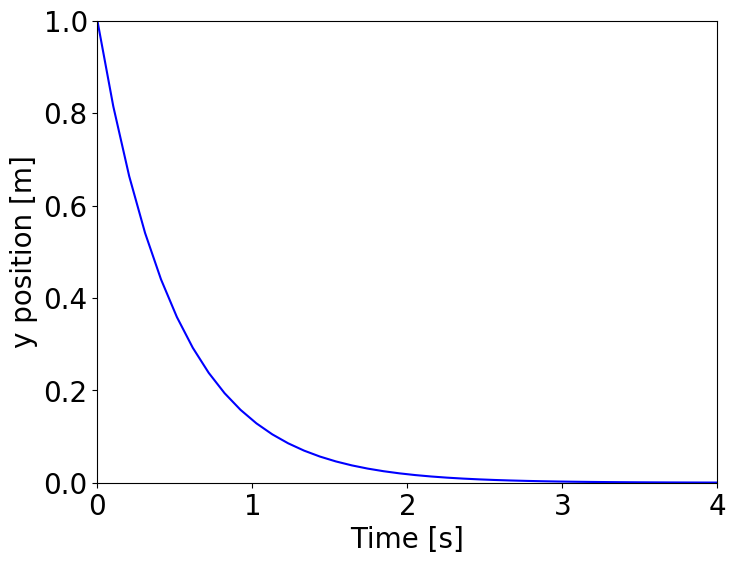

In [10]:
""" first-oder ODE equations 
    dy/dt = rhs(y1,y2,...,t0,...) """
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

# dy/dt = -2y  (t=0 to 4) & initial y(t=0) = 1
def calc_derivative(ypos, time, counter_arr):
    counter_arr += 1
    return -2*ypos

counter = np.zeros((1,), dtype=np.uint16)
print counter

time_vec = np.linspace(0,4,40)
yvec, info = odeint(calc_derivative, 1, time_vec,
                   args=(counter,), full_output=True)
print counter

""" Draw """
plt.figure(figsize=(8,6))

#plt.figtext(fontsize=30)

plt.plot(time_vec, yvec, 'b-')
plt.tick_params(labelsize=20)
plt.xlabel('Time [s]', fontsize=20)
plt.ylabel('y position [m]', fontsize=20)
plt.xlim(0.,4.)
plt.ylim(0.,1.)

plt.show()

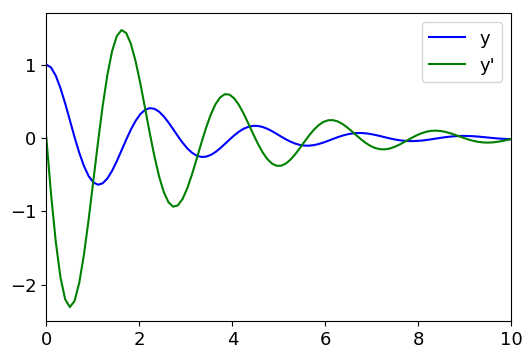

In [11]:
""" Second-order ODE equations 
    y'' + 2 eps wo y' + wo^2 y = 0
    wo^2 = k/m
    eps = c/(2 m wo) """

from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

m = 0.5
k = 4
c = 0.4

eps = c / (2.*m*np.sqrt(k/m))

# coeff: nu = 2*eps*wo = c/m  
#        om = wo^2 = k/m
nu_coef = c/m
om_coef = k/m

def calc_deri(yvec, time, nuc, omc):
    return (yvec[1], -nuc*yvec[1] - omc*yvec[0])

time_vec = np.linspace(0,10,100)
yarr = odeint(calc_deri, (1,0), time_vec, args=(nu_coef,om_coef))

""" Draw """
plt.plot(time_vec, yarr[:,0], 'b-',label='y')
plt.plot(time_vec, yarr[:,1], 'g-',label="y'")

plt.xlim(0.,10.)
plt.ylim(-2.5,1.7)
plt.legend(loc='upper right')
plt.show()

## Fitting

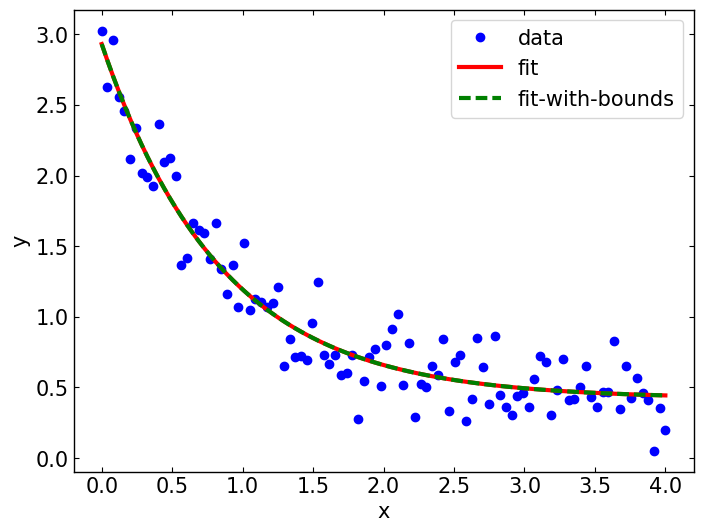

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
%matplotlib inline

def func(x, a, b, c):
    return a * np.exp(-b * x) + c

# define the data to be fit with some noise

xdata = np.linspace(0, 4, 100)
y = func(xdata, 2.5, 1.3, 0.5)
y_noise = 0.2 * np.random.normal(size=xdata.size)
ydata = y + y_noise


fig, ax = plt.subplots(figsize=(8,6))

ax.plot(xdata, ydata, 'bo', label='data')

# Fit for the parameters a, b, c of the function `func`

popt, pcov = curve_fit(func, xdata, ydata)
ax.plot(xdata, func(xdata, *popt), 'r-', label='fit',linewidth=3)

# Constrain the optimization to the region of ``0 < a < 3``, ``0 < b < 2``
# and ``0 < c < 1``:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 2., 1.]))
ax.plot(xdata, func(xdata, *popt), 'g--', label='fit-with-bounds', linewidth=3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(loc='best')